# 📌 Introduction

![image.png](attachment:ecafcddb-f01b-47ac-b38e-1cd964b2b971.png)

Waste is a significant global issue. Increasing volumes of waste are being generated as the global population and living standards rise. People are increasingly concerned about the production of waste and its effect, and are seeking ways to deal with the problem.

Recycling is the process of converting waste materials into new materials and objects. The recovery of energy from waste materials is often included in this concept. The recyclability of a material depends on its ability to reacquire the properties it had in its original state. It is an alternative to "conventional" waste disposal that can save material and help lower greenhouse gas emissions. Recycling can prevent the waste of potentially useful materials and reduce the consumption of fresh raw materials, thereby reducing: energy usage, air pollution (from incineration), and water pollution (from landfilling).

 **🟢 In this notebook, we will classify waste as organic or recyclable using Convolutional Neural Network (CNN).**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Projects/waste-classification-with-cnn/Waste.zip', '/content')

In [ ]:
train_path = "/content/DATASET/TRAIN"
test_path = "/content/DATASET/TEST"

## Import Libraries

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
# from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

## Visualization

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 12565/12565 [00:07<00:00, 1782.70it/s]


In [ ]:
data.shape

(22564, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'R': 9999, 'O': 12565})

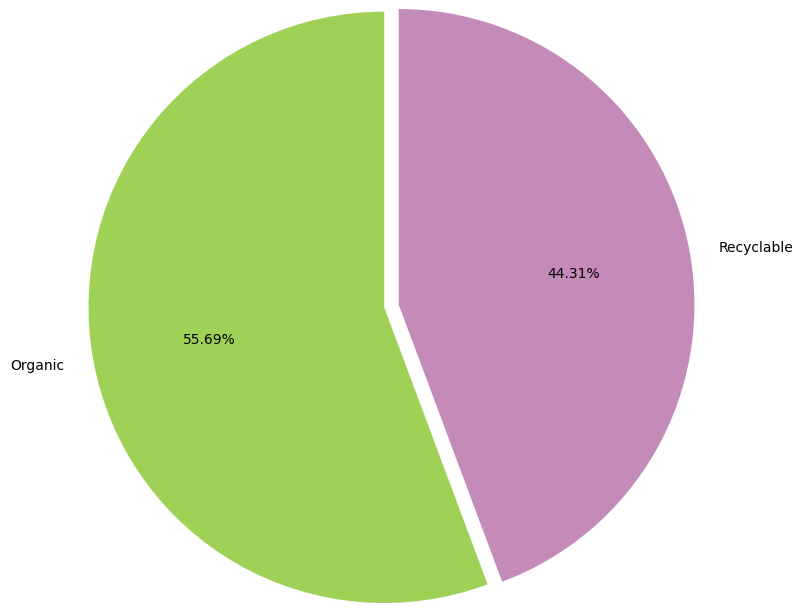

In [ ]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05],autopct='%0.2f%%',
        labels=['Organic', 'Recyclable'], colors= colors,radius=2)
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(15000)
    plt.title('This image is of {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

Output hidden; open in https://colab.research.google.com to view.

* O -> Organic
* R -> Recyclable

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  2


# Convolutional Neural Network - CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


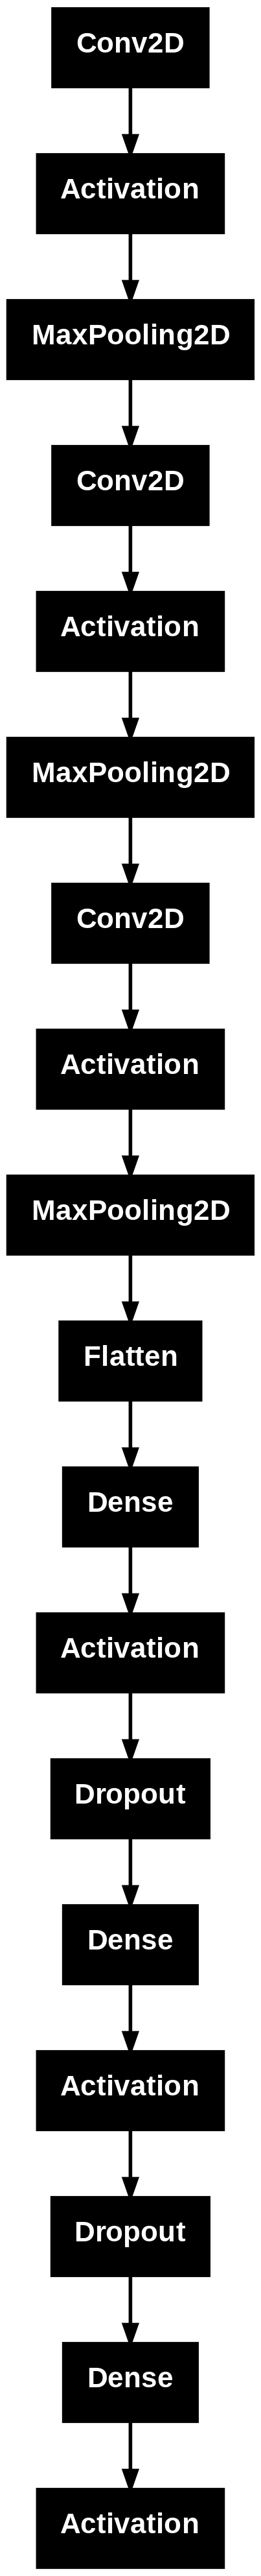

In [ ]:
plot_model(model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
hist = model.fit(
    x = train_generator,  # Pass train_generator to 'x'
    epochs=10,
    validation_data = test_generator)  # Pass test_generator to 'validation_data'

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


89/89 ━━━━━━━━━━━━━━━━━━━━ 106s 860ms/step - accuracy: 0.7172 - loss: 0.6283 - val_accuracy: 0.8532 - val_loss: 0.3815
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 54s 576ms/step - accuracy: 0.8262 - loss: 0.4192 - val_accuracy: 0.8504 - val_loss: 0.3469
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 575ms/step - accuracy: 0.8445 - loss: 0.3742 - val_accuracy: 0.8615 - val_loss: 0.3258
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 83s 581ms/step - accuracy: 0.8642 - loss: 0.3430 - val_accuracy: 0.8556 - val_loss: 0.3117
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 581ms/step - accuracy: 0.8704 - loss: 0.3242 - val_accuracy: 0.8818 - val_loss: 0.2869
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 56s 590ms/step - accuracy: 0.8842 - loss: 0.2958 - val_accuracy: 0.8830 - val_loss: 0.3122
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 575ms/step - accuracy: 0.8927 - loss: 0.2681 - val_accuracy: 0.8965 - val_loss: 0.2738
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 55s 576ms/step - accuracy: 0.9053 - loss: 0.2463 - val_accuracy: 0.89

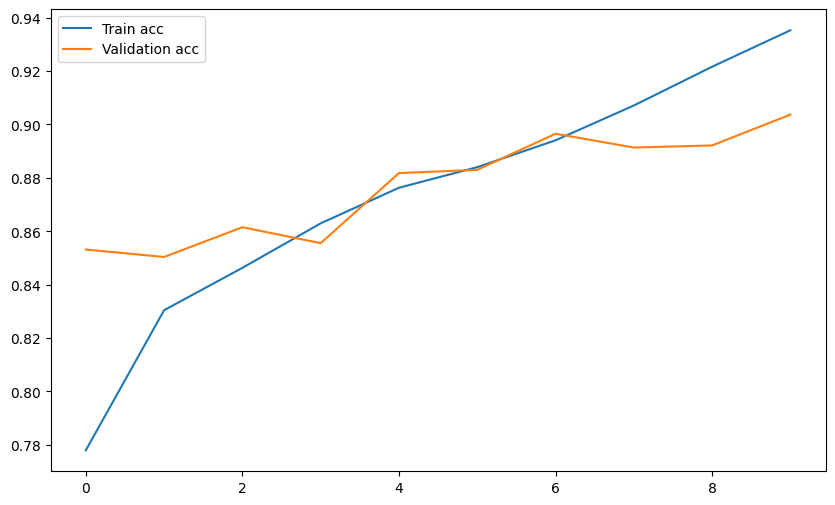

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(hist.history["accuracy"], label = "Train acc")
plt.plot(hist.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

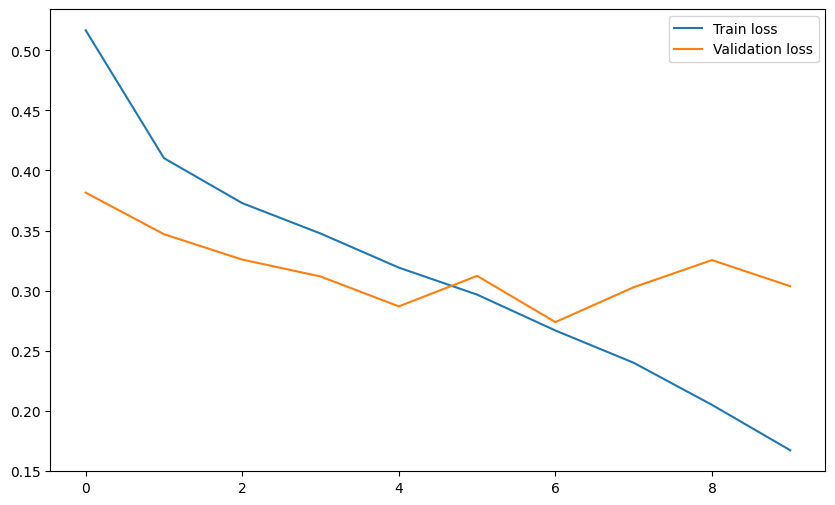

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label = "Train loss")
plt.plot(hist.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

## Model Prediction

In [ ]:
def predict_func(img):
    plt.figure(figsize=(6,4))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.tight_layout()
    img = cv2.resize(img, (224, 224))
    img = np.reshape(img, [-1, 224, 224,3])
    result = np.argmax(model.predict(img))
    if result == 0: print("\033[94m"+"This image -> Recyclable"+"\033[0m")
    elif result ==1: print("\033[94m"+"This image -> Organic"+"\033[0m")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
This image -> Organic


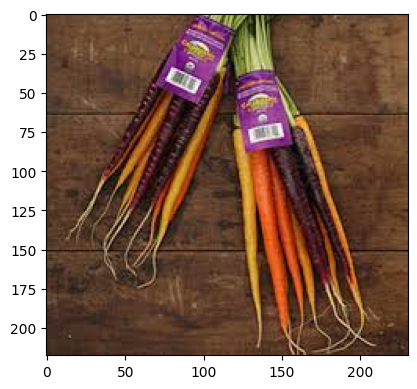

In [ ]:
test_img = cv2.imread("/content/DATASET/TEST/O/O_12573.jpg")
predict_func(test_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
This image -> Recyclable


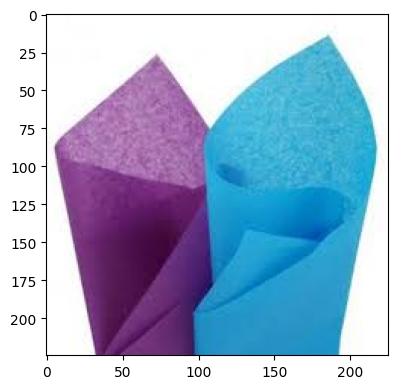

In [ ]:
test_img = cv2.imread("/content/DATASET/TEST/R/R_10753.jpg")
predict_func(test_img)